# Stock Prices Prediction Using Keras Long Short Term Memory

In [1]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head(),dataset_train.tail()


(         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
 0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
 1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
 2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
 3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
 4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
 
    Turnover (Lacs)  
 0          7162.35  
 1         11859.95  
 2          5248.60  
 3          5503.90  
 4          7999.55  ,
             Date   Open    High     Low    Last   Close  Total Trade Quantity  \
 2030  2010-07-27  117.6  119.50  112.00  118.80  118.65                586100   
 2031  2010-07-26  120.1  121.00  117.10  117.10  117.60                658440   
 2032  2010-07-23  121.8  121.95  120.25  120.35  120.65                281312   
 2033  2010-07-22  120.3  122.00  120.25  120.75  120.90 

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
len(training_set_scaled), training_set_scaled.shape, training_set_scaled

(2035, (2035, 1), array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.16504461],
        [0.15896188],
        [0.16626115]]))

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
training_set_scaled

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [8]:
training_set_scaled[0:60, 0]

array([0.6202352 , 0.62226277, 0.64436334, 0.61719384, 0.61820762,
       0.62408759, 0.62793998, 0.63584753, 0.61658556, 0.57725061,
       0.54845904, 0.57339822, 0.57339822, 0.56731549, 0.57948094,
       0.57137064, 0.63706407, 0.62814274, 0.63219789, 0.62550689,
       0.61942417, 0.63219789, 0.61111111, 0.62206002, 0.64557989,
       0.67234388, 0.66058394, 0.64760746, 0.6283455 , 0.62408759,
       0.61597729, 0.63341444, 0.63077859, 0.63321168, 0.64841849,
       0.62469586, 0.62814274, 0.61394972, 0.67964315, 0.65815085,
       0.6593674 , 0.64841849, 0.62773723, 0.67883212, 0.66058394,
       0.63990268, 0.60888078, 0.6431468 , 0.6784266 , 0.65064882,
       0.71695053, 0.74574209, 0.7676399 , 0.78548256, 0.78994323,
       0.75892133, 0.76520681, 0.79622871, 0.81062449, 0.74371452])

In [9]:
X_train.shape, X_train

((1975, 60),
 array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
         0.74371452],
        [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
         0.77007299],
        [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
         0.73641525],
        ...,
        [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
         0.15815085],
        [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
         0.16504461],
        [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
         0.15896188]]))

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
X_train.shape, X_train

((1975, 60, 1), array([[[0.6202352 ],
         [0.62226277],
         [0.64436334],
         ...,
         [0.79622871],
         [0.81062449],
         [0.74371452]],
 
        [[0.62226277],
         [0.64436334],
         [0.61719384],
         ...,
         [0.81062449],
         [0.74371452],
         [0.77007299]],
 
        [[0.64436334],
         [0.61719384],
         [0.61820762],
         ...,
         [0.74371452],
         [0.77007299],
         [0.73641525]],
 
        ...,
 
        [[0.19870235],
         [0.21796431],
         [0.21553122],
         ...,
         [0.14963504],
         [0.14801298],
         [0.15815085]],
 
        [[0.21796431],
         [0.21553122],
         [0.20600162],
         ...,
         [0.14801298],
         [0.15815085],
         [0.16504461]],
 
        [[0.21553122],
         [0.20600162],
         [0.21654501],
         ...,
         [0.15815085],
         [0.16504461],
         [0.15896188]]]))

In [12]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

C:\Users\rahsood\AppData\Local\Continuum\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [13]:
X_train.shape[1], 1 
# 3D Shape has Time-steps and Features

(60, 1)

#50 is the dimensionality of the output space

In [14]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [18]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [19]:
print(regressor.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
__________

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0113
Epoch 2/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0026
Epoch 3/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0026
Epoch 4/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0025
Epoch 5/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0026
Epoch 6/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0023
Epoch 7/100
1975/1975 [==============================] - 7s 3ms/step - loss: 0.0022
Epoch 8/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0019
Epoch 9/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0018
Epoch 10/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0020
Epoch 11/100
1975/1975 [==============================] - 7s 4ms/step - loss: 0.0018
Epoch 12/100
1975/1975 [==============================] - 10s 5ms/step - 

1975/1975 [==============================] - 8s 4ms/step - loss: 7.3653e-04
Epoch 95/100
1975/1975 [==============================] - 7s 4ms/step - loss: 5.6176e-04
Epoch 96/100
1975/1975 [==============================] - 8s 4ms/step - loss: 6.2735e-04
Epoch 97/100
1975/1975 [==============================] - 8s 4ms/step - loss: 6.1815e-04
Epoch 98/100
1975/1975 [==============================] - 8s 4ms/step - loss: 6.7295e-04
Epoch 99/100
1975/1975 [==============================] - 7s 4ms/step - loss: 6.4010e-04
Epoch 100/100
1975/1975 [==============================] - 7s 4ms/step - loss: 6.5149e-04


In [21]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [22]:
real_stock_price

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [23]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


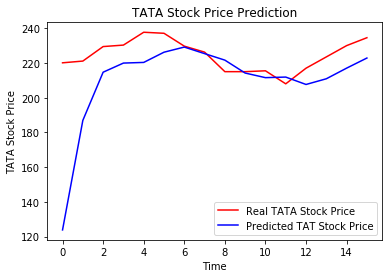

In [24]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TAT Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [25]:
X_train

array([[[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.79622871],
        [0.81062449],
        [0.74371452]],

       [[0.62226277],
        [0.64436334],
        [0.61719384],
        ...,
        [0.81062449],
        [0.74371452],
        [0.77007299]],

       [[0.64436334],
        [0.61719384],
        [0.61820762],
        ...,
        [0.74371452],
        [0.77007299],
        [0.73641525]],

       ...,

       [[0.19870235],
        [0.21796431],
        [0.21553122],
        ...,
        [0.14963504],
        [0.14801298],
        [0.15815085]],

       [[0.21796431],
        [0.21553122],
        [0.20600162],
        ...,
        [0.14801298],
        [0.15815085],
        [0.16504461]],

       [[0.21553122],
        [0.20600162],
        [0.21654501],
        ...,
        [0.15815085],
        [0.16504461],
        [0.15896188]]])

In [26]:
y_train

array([0.77007299, 0.73641525, 0.73763179, ..., 0.16504461, 0.15896188,
       0.16626115])

In [33]:
type(predicted_stock_price)

numpy.ndarray

In [55]:
frames = [pd.DataFrame(predicted_stock_price, columns=['Predicted']), pd.DataFrame(real_stock_price, columns=['Real'])]

In [56]:
df_comparison = pd.concat(frames, axis=1)

In [57]:
df_comparison

,Predicted,Real
0,123.878006,220.10
1,186.940353,221.10
2,214.690201,229.45
3,219.947403,230.30
4,220.322388,237.70
5,226.205154,237.10
6,229.161453,229.70
7,225.390656,226.25
8,221.638260,215.00
9,214.205719,215.00
